In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import math
import calendar
from sklearn.metrics import classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
from sklearn.feature_selection import RFE
pd.set_option('display.max_rows',1000)
from math import radians, sin, cos, sqrt, asin
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
from xgboost import XGBClassifier
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

EPS = np.finfo(np.float64).eps

In [2]:
# Reading the test dataset

fraud_test = pd.read_csv('fraudTest.csv')
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
# Reading the train dataset

fraud_train = pd.read_csv('fraudTrain.csv')
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Converting columns to datetime for fraudTest
fraud_test.loc[:, 'dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test.loc[:, 'trans_date_trans_time'] = pd.to_datetime(fraud_test['trans_date_trans_time'])

fraud_train.loc[:, 'dob'] = pd.to_datetime(fraud_train['dob'])
fraud_train.loc[:, 'trans_date_trans_time'] = pd.to_datetime(fraud_train['trans_date_trans_time'])

In [5]:
# Creating a new column called Transaction date and converting into datetime

fraud_test['Transaction_Date'] = pd.to_datetime(fraud_test['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraud_test.Transaction_Date = pd.to_datetime(fraud_test['Transaction_Date'])

fraud_train['Transaction_Date'] = pd.to_datetime(fraud_train['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraud_train.Transaction_Date = pd.to_datetime(fraud_train['Transaction_Date'])

In [6]:
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [7]:
# Creating a new column called Age

fraud_test['Age'] = round((fraud_test['Transaction_Date'] - fraud_test['dob'])/np.timedelta64(1, 'Y'))
fraud_test.Age = fraud_test.Age.astype('int')

fraud_train['Age'] = round((fraud_train['Transaction_Date'] - fraud_train['dob'])/np.timedelta64(1, 'Y'))
fraud_train.Age = fraud_train.Age.astype('int')

In [8]:
# Creating a new column called Transaction Time

fraud_test['Transaction_Time'] = pd.to_datetime(fraud_test['trans_date_trans_time'], format='%Y:%M:%D').dt.time

# Creating a new column called Transaction Time

fraud_train['Transaction_Time'] = pd.to_datetime(fraud_train['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [9]:
# Creating a function to calculate the Day of Week
import datetime
import calendar


def DoW(x):
    day = datetime.datetime.weekday(x)
    return (calendar.day_name[day])

fraud_test['Day_of_Week'] = fraud_test['Transaction_Date'].apply(DoW)
fraud_train['Day_of_Week'] = fraud_train['Transaction_Date'].apply(DoW)

In [10]:
# Creating a new column Month

fraud_test['Month'] = pd.DatetimeIndex(fraud_test.trans_date_trans_time).month
fraud_train['Month'] = pd.DatetimeIndex(fraud_train.trans_date_trans_time).month

# Making Gender column binary

fraud_test['gender'] = fraud_test['gender'].map({'F':1, 'M':0})
fraud_train['gender'] = fraud_train['gender'].map({'F':1, 'M':0})

# Ensuring Day of Week is represented numerically
fraud_test['Day_of_Week'] = fraud_test['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})
fraud_train['Day_of_Week'] = fraud_train['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [11]:
# Creating a function to calculate the distance between customer's base location and merchant location
from math import radians, sin, cos, sqrt, asin

def haversineDistance(lat1, lon1, lat2, lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(sin(Lat_Dist / 2), 2) + pow(sin(Long_Dist / 2), 2) * cos(radians(lat1)) * cos(radians(lat2)));
    radius = 6371
    cal = 2 * asin(sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(fraud_train['lat'], fraud_train['long'], fraud_train['merch_lat'], fraud_train['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
fraud_train['Dist'] = Dist
fraud_train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,Transaction_Date,Age,Transaction_Time,Day_of_Week,Month,Dist
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019-01-01,31,00:00:18,2,1,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,2019-01-01,41,00:00:44,2,1,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,2019-01-01,57,00:00:51,2,1,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,2019-01-01,52,00:01:16,2,1,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,2019-01-01,33,00:03:06,2,1,77.556744


In [12]:
# Calling the function created earlier to calculate the Distance between the customer's home location and the location of transactions (fraudulent or otherwise)

Dist2 = []
for a,b,c,d in zip(fraud_test['lat'], fraud_test['long'], fraud_test['merch_lat'], fraud_test['merch_long']):
    Dist2.append(haversineDistance(a,b,c,d))

In [13]:
# Adding the calculated Distance column in the test dataframe

fraud_test['Dist'] = Dist2
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,Transaction_Date,Age,Transaction_Time,Day_of_Week,Month,Dist
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,0,351 Darlene Green,...,1371816865,33.986391,-81.200714,0,2020-06-21,52,12:14:25,7,6,24.561462
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,1,3638 Marsh Union,...,1371816873,39.450498,-109.960431,0,2020-06-21,30,12:14:33,7,6,104.925092
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,1,9333 Valentine Point,...,1371816893,40.495810,-74.196111,0,2020-06-21,50,12:14:53,7,6,59.080078
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,0,32941 Krystal Mill Apt. 552,...,1371816915,28.812398,-80.883061,0,2020-06-21,33,12:15:15,7,6,27.698567
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,0,5783 Evan Roads Apt. 465,...,1371816917,44.959148,-85.884734,0,2020-06-21,65,12:15:17,7,6,104.335106


In [14]:
fraud_test['amt'] = np.log(fraud_test['amt'])
fraud_test['city_pop'] = np.log(fraud_test['city_pop'])

fraud_train['amt'] = np.log(fraud_train['amt'])
fraud_train['city_pop'] = np.log(fraud_train['city_pop'])

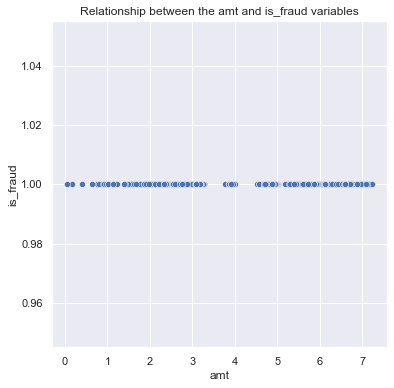

In [207]:
#scatterplot to visualize the relationship between the amt and is_fraud variables in the fraudTrain dataset
plt.figure(figsize = (6,6))
sns.scatterplot(data = fraud_train[fraud_train['is_fraud'] == 1], x = 'amt', y = 'is_fraud')
plt.title('Relationship between the amt and is_fraud variables')
plt.show()

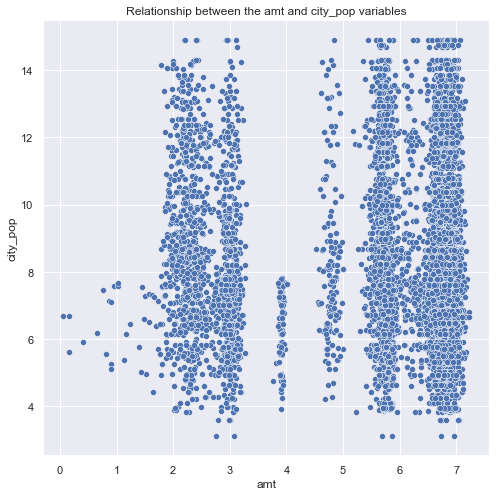

In [208]:
#scatterplot to visualize the relationship between the amt and city_pop variables in the fraudTrain dataset
plt.figure(figsize = (8,8))
sns.scatterplot(data = fraud_train[fraud_train['is_fraud'] == 1], x = 'amt', y = 'city_pop')
plt.title('Relationship between the amt and city_pop variables')
plt.show()

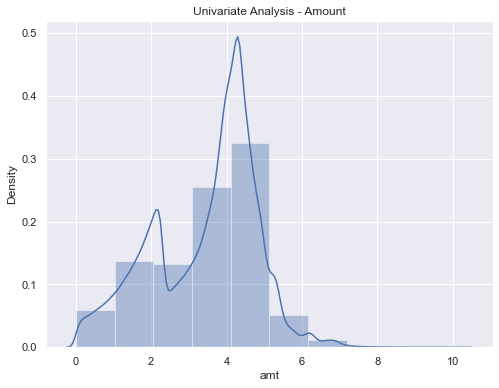

In [17]:
#distribution plot to visualize the distribution of the amt variable in the fraudTrain dataset

plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraud_train.amt, bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

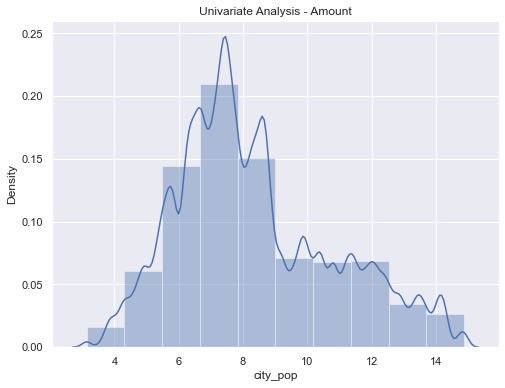

In [18]:
#distribution plot to visualize the distribution of the city_pop variable in the fraudTrain dataset

plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraud_train['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

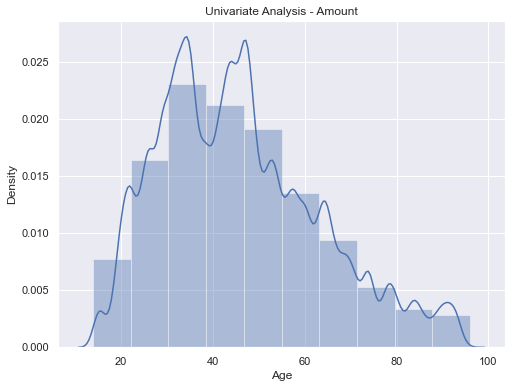

In [19]:
#distribution of values in the 'Age' column of the 'fraudTrain' dataset
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraud_train['Age'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

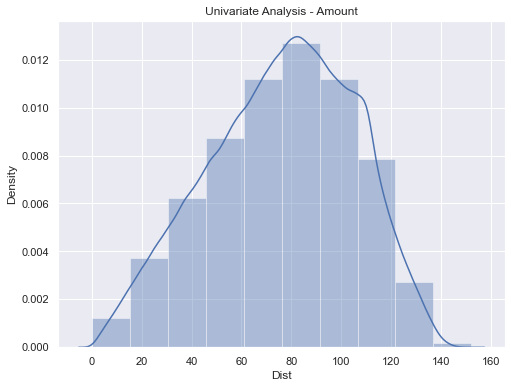

In [20]:
#distribution of values in the 'Dist' column of the 'fraudTrain' dataset
plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraud_train['Dist'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

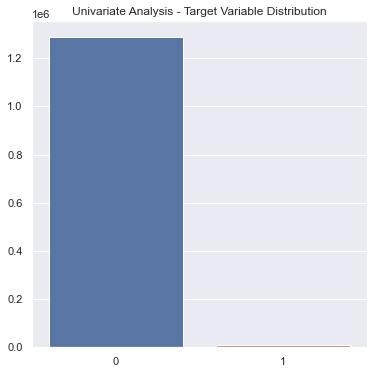

In [21]:
#barplot  to visualize the distribution of the target variable
x = [0, 1]
y = [fraud_train.is_fraud.value_counts()[0],fraud_train.is_fraud.value_counts()[1]]

plt.figure(figsize = [6,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Target Variable Distribution')
plt.show()

Text(0.5, 1.0, 'Univariate Analysis - Gender Distribution')

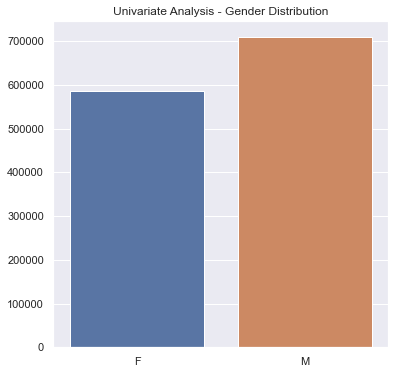

In [22]:
#barplot to visualize the distribution of the gender variable in the fraudTrain dataset.

x = ['F', 'M']
y = [fraud_train.gender.value_counts()[0], fraud_train.gender.value_counts()[1]]

plt.figure(figsize = [6,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Gender Distribution')

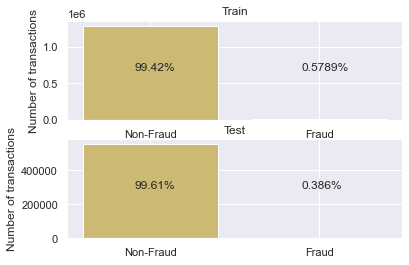

In [23]:
# Checking Class Imbalance

classes_train=fraud_train['is_fraud'].value_counts()
normal_share_train=classes_train[0]/fraud_train['is_fraud'].count()*100
fraud_share_train=classes_train[1]/fraud_train['is_fraud'].count()*100

classes_test=fraud_test['is_fraud'].value_counts()
normal_share_test=classes_test[0]/fraud_test['is_fraud'].count()*100
fraud_share_test=classes_test[1]/fraud_test['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [24]:
fraud_city = pd.DataFrame(fraud_train.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [25]:

fraud_state = pd.DataFrame(fraud_train.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index
     

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [26]:

fraud_job = pd.DataFrame(fraud_train.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [27]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

fraud_train['lat_dist'] = abs(round(fraud_train['merch_lat']-fraud_train['lat'],3))
fraud_train['long_dist'] = abs(round(fraud_train['merch_long']-fraud_train['long'],3))

fraud_test['lat_dist'] = abs(round(fraud_test['merch_lat']-fraud_test['lat'],3))
fraud_test['long_dist'] = abs(round(fraud_test['merch_long']-fraud_test['long'],3))

fraud_train[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()
     

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [28]:
fraud_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
Transaction_Date             537
Age                           83
Transaction_Time           86400
Day_of_Week                    7
Month                         12
Dist                     1296675
lat_dist                    1001
long_dist 

In [29]:
fraud_test.nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
Transaction_Date            194
Age                          82
Transaction_Time          86092
Day_of_Week                   7
Month                         7
Dist                     555719
lat_dist                   1001
long_dist                  1001
dtype: i

In [30]:
fraud_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
Transaction_Date             537
Age                           83
Transaction_Time           86400
Day_of_Week                    7
Month                         12
Dist                     1296675
lat_dist                    1001
long_dist 

In [31]:
round(fraud_train['category'].value_counts()/len(fraud_train.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [32]:
round(fraud_train['gender'].value_counts()/len(fraud_train.index)*100,2)

1    54.74
0    45.26
Name: gender, dtype: float64

In [33]:
round(fraud_train['city'].value_counts()/len(fraud_train.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta       

In [34]:

round(fraud_train['state'].value_counts()/len(fraud_train.index)*100,2)

TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [35]:

round(fraud_train['job'].value_counts()/len(fraud_train.index)*100,2)

Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                     

In [36]:
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,Transaction_Date,Age,Transaction_Time,Day_of_Week,Month,Dist,lat_dist,long_dist
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,1.050822,Jeff,Elliott,0,351 Darlene Green,...,-81.200714,0,2020-06-21,52,12:14:25,7,6,24.561462,0.020,0.265
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,3.395850,Joanne,Williams,1,3638 Marsh Union,...,-109.960431,0,2020-06-21,30,12:14:33,7,6,104.925092,0.870,0.476
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,3.720378,Ashley,Lopez,1,9333 Valentine Point,...,-74.196111,0,2020-06-21,50,12:14:53,7,6,59.080078,0.177,0.660
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,4.095178,Brian,Williams,0,32941 Krystal Mill Apt. 552,...,-80.883061,0,2020-06-21,33,12:15:15,7,6,27.698567,0.243,0.064
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,1.160021,Nathan,Massey,0,5783 Evan Roads Apt. 465,...,-85.884734,0,2020-06-21,65,12:15:17,7,6,104.335106,0.706,0.868


In [166]:
# Dropping variables not useful for model building

drop_cols = ['Unnamed: 0','trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','Transaction_Date','Transaction_Time','cc_num','merchant','first','last','street','zip','trans_num','unix_time']

fraud_train1 = fraud_train.drop(drop_cols,axis=1)
fraud_test1 = fraud_test.drop(drop_cols,axis=1)

fraud_test1.head()

,category,amt,gender,state,city_pop,Age,Day_of_Week,Month,Dist,lat_dist,long_dist
0,personal_care,1.050822,0,SC,12.717389,52,7,6,24.561462,0.020,0.265
1,personal_care,3.395850,1,UT,5.710427,30,7,6,104.925092,0.870,0.476
2,health_fitness,3.720378,1,NY,10.448599,50,7,6,59.080078,0.177,0.660
3,misc_pos,4.095178,0,FL,10.910843,33,7,6,27.698567,0.243,0.064
4,travel,1.160021,0,MI,7.026427,65,7,6,104.335106,0.706,0.868


In [38]:
fraud_train1[['amt','city_pop','Age','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,Age,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,3.457514e+00,8.360216e+00,4.599836e+01,5.002626e-01,5.003366e-01
std,1.387861e+00,2.453511e+00,1.739636e+01,2.885700e-01,2.888704e-01
min,0.000000e+00,3.135494e+00,1.400000e+01,0.000000e+00,0.000000e+00
25%,2.266958e+00,6.610696e+00,3.300000e+01,2.500000e-01,2.500000e-01
50%,3.861151e+00,7.806289e+00,4.400000e+01,5.010000e-01,5.000000e-01
75%,4.420526e+00,9.919755e+00,5.700000e+01,7.500000e-01,7.510000e-01
90%,4.917569e+00,1.213425e+01,7.100000e+01,9.000000e-01,9.000000e-01
95%,5.279695e+00,1.317251e+01,8.000000e+01,9.500000e-01,9.500000e-01
99%,6.302605e+00,1.427128e+01,9.100000e+01,9.900000e-01,9.900000e-01


In [39]:
# Creating dummy variables for Category

fraud_train2 = pd.get_dummies(fraud_train1,columns=['category'],drop_first=True)
fraud_test2 = pd.get_dummies(fraud_test1,columns=['category'],drop_first=True)

fraud_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  float64
 4   is_fraud                 1296675 non-null  int64  
 5   Age                      1296675 non-null  int32  
 6   Day_of_Week              1296675 non-null  int64  
 7   Month                    1296675 non-null  int64  
 8   Dist                     1296675 non-null  float64
 9   lat_dist                 1296675 non-null  float64
 10  long_dist                1296675 non-null  float64
 11  category_food_dining     1296675 non-null  uint8  
 12  category_gas_transport   1296675 non-null  uint8  
 13  category_grocery_net     1296675 non-null 

In [40]:
# Dropping State

fraud_train3 = fraud_train2.drop('state',axis=1)
fraud_test3 = fraud_test2.drop('state',axis=1)
fraud_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  float64
 3   is_fraud                 1296675 non-null  int64  
 4   Age                      1296675 non-null  int32  
 5   Day_of_Week              1296675 non-null  int64  
 6   Month                    1296675 non-null  int64  
 7   Dist                     1296675 non-null  float64
 8   lat_dist                 1296675 non-null  float64
 9   long_dist                1296675 non-null  float64
 10  category_food_dining     1296675 non-null  uint8  
 11  category_gas_transport   1296675 non-null  uint8  
 12  category_grocery_net     1296675 non-null  uint8  
 13  category_grocery_pos     1296675 non-null 

In [41]:
# Splitting train and test dataset into X and y

X_train = fraud_train3.drop(['is_fraud'],axis=1)
y_train = fraud_train3['is_fraud']

X_test = fraud_test3.drop(['is_fraud'],axis=1)
y_test = fraud_test3['is_fraud']

### Oversampling data to compensate for the high class imbalance in the data

In [42]:
# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288418)]


#### Building a Random Forest Model

In [43]:
# Importing required library

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [44]:
#estimate of the classification accuracy of the model using an out-of-bag (OOB) sample
rf.oob_score_

0.8701615115222106

In [45]:
classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression(random_state=42)))
classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNN', KNeighborsClassifier()))
#classifiers.append(('SVM', SVC(random_state=42, probability=True)))
classifiers.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
classifiers.append(('Random Forest', RandomForestClassifier(random_state=42)))
classifiers.append(('XGBoost', XGBClassifier(random_state=42)))

#Ensemble classifier - All classifiers have the same weight
eclf = VotingClassifier(estimators=classifiers, voting='soft', weights=np.ones(len(classifiers)))

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
    from sklearn import svm
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    from scipy import interp
    from tabulate import tabulate
    import pandas as pd
    
    results = []

    def plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
        '''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''

        name = classifier[0]
        classifier = classifier[1]

        mean_fpr = np.linspace(0, 1, 100)
        class_names = ['Non-Fraud', 'Fraud']
        confusion_matrix_total = [[0, 0], [0, 0]]

        #Obtain probabilities for each class
        probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                 label='Chance', alpha=.8)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve - model: ' + name)
        plt.legend(loc="lower right")
        plt.show()

        #Store the confusion matrix result to plot a table later
        y_pred=classifier.predict(X_test)
        cnf_matrix = confusion_matrix(y_test, y_pred)
        confusion_matrix_total += cnf_matrix

        #Print precision and recall
        tn, fp = confusion_matrix_total.tolist()[0]
        fn, tp = confusion_matrix_total.tolist()[1]
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        results.append([name, roc_auc, accuracy, precision, recall])
        print('Accuracy = {:2.2f}%'.format(accuracy*100))
        print('Precision = {:2.2f}%'.format(precision*100))
        print('Recall = {:2.2f}%'.format(recall*100))
 

        # Plot confusion matrix
        plt.figure()
        plot_confusion_matrix(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
        plt.show()

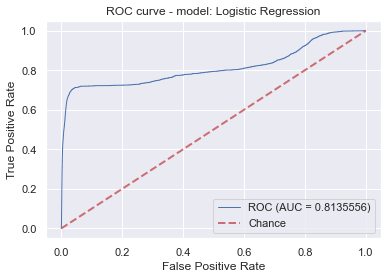

Accuracy = 99.61%
Precision = 0.00%
Recall = 0.00%


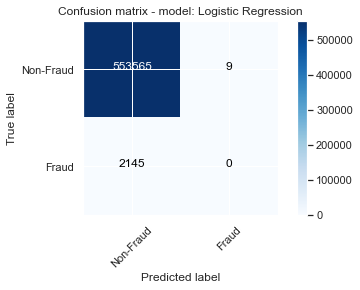

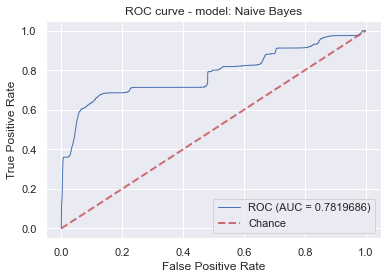

Accuracy = 84.45%
Precision = 1.69%
Recall = 68.53%


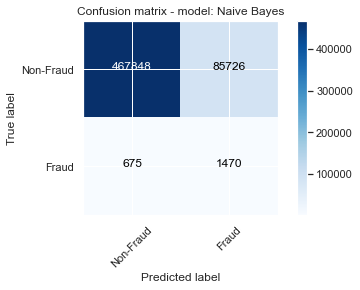

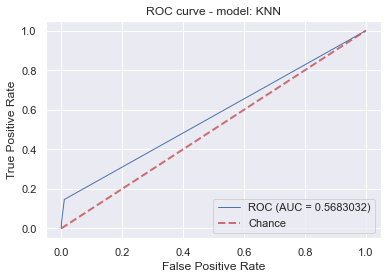

Accuracy = 99.61%
Precision = 16.67%
Recall = 0.37%


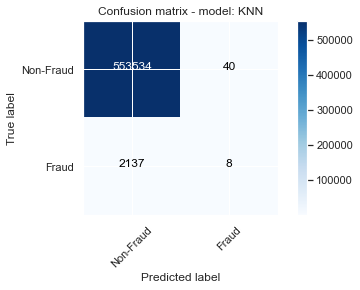

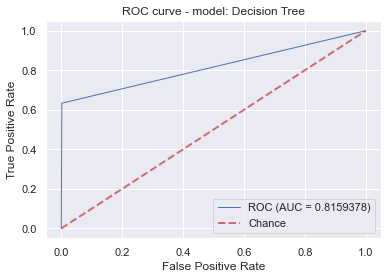

Accuracy = 99.69%
Precision = 59.22%
Recall = 63.36%


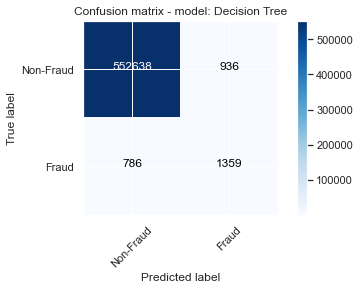

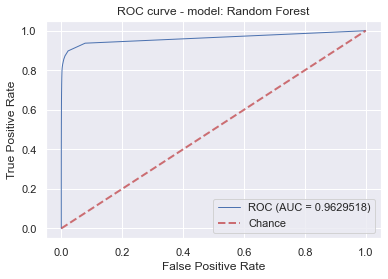

Accuracy = 99.80%
Precision = 83.21%
Recall = 59.86%


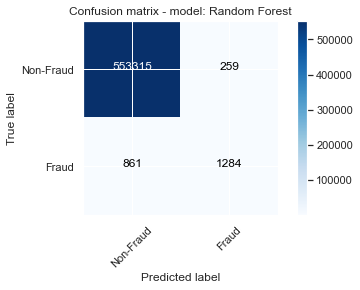

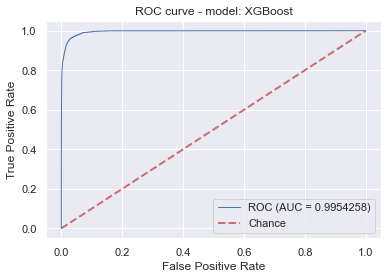

Accuracy = 99.78%
Precision = 81.05%
Recall = 57.81%


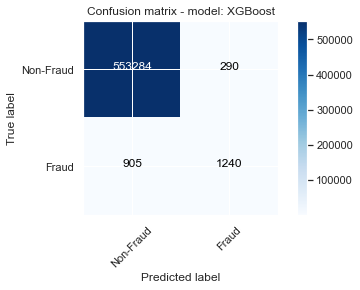

In [48]:
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_train, y_train, X_test, y_test)

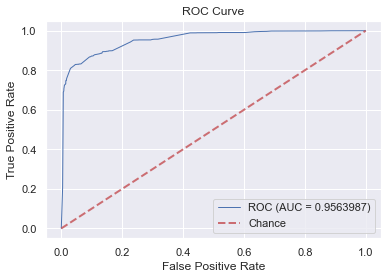

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_pred_proba = rf.predict_proba(X_train_res)[:,1]

# Compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train_res, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [50]:
#display the feature importance of each variable in the random forest model
imp_df = pd.DataFrame({ "Varname": X_train.columns,"Imp": rf.feature_importances_})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.841799
1,gender,0.048218
15,category_kids_pets,0.019356
14,category_home,0.018991
4,Day_of_Week,0.018397
9,category_food_dining,0.010331
10,category_gas_transport,0.010116
21,category_travel,0.007501
20,category_shopping_pos,0.006624
17,category_misc_pos,0.006319


In [51]:
# predicted values for the target variable using the trained random forest model 
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
#classification report for the training set predictions
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88   1289169
           1       0.98      0.76      0.85   1288418

    accuracy                           0.87   2577587
   macro avg       0.89      0.87      0.87   2577587
weighted avg       0.89      0.87      0.87   2577587



### Predicting on test dataset

In [53]:
#predicted values for test variable using the trained random forest model 
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
#classification report for the test set predictions
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.80      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.89      0.62    555719
weighted avg       1.00      0.98      0.99    555719



#### Testing model on original data without oversampling

In [154]:
#Evaluating the performance of the trained random forest classifier model on the training datasets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.21      0.82      0.34      7506

    accuracy                           0.98   1296675
   macro avg       0.60      0.90      0.66   1296675
weighted avg       0.99      0.98      0.99   1296675

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.80      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.89      0.62    555719
weighted avg       1.00      0.98      0.99    555719



In [61]:
# Subset of fraud_train

fraud_train_merge = fraud_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
fraud_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,1.603420,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,4.674976,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,5.394127,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,3.806662,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,3.736717,a41d7549acf90789359a9aa5346dcb46,0


In [58]:
# Creating dataframe of y_train_pred

fraud_train_pred = pd.DataFrame(y_train_pred)
fraud_train_pred.head()

,0
0,0
1,0
2,1
3,0
4,0


In [62]:
# Merging the two dataframes

fraud_train_final = pd.concat([fraud_train_merge, fraud_train_pred],axis=1)
fraud_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,1.603420,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,4.674976,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,5.394127,a1a22d70485983eac12b5b88dad1cf95,0,1
3,2019-01-01 00:01:16,3.806662,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,3.736717,a41d7549acf90789359a9aa5346dcb46,0,0


In [63]:
# Renaming column
fraud_train_final= fraud_train_final.rename(columns={ 0 : 'is_fraud_pred'})
fraud_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,1.603420,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,4.674976,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,5.394127,a1a22d70485983eac12b5b88dad1cf95,0,1
3,2019-01-01 00:01:16,3.806662,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,3.736717,a41d7549acf90789359a9aa5346dcb46,0,0


In [181]:
#grouping the rows of the fraud_train_final dataframe
fraud_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [65]:
#grouping the rows in the fraud_train_final DataFrame
fraud_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1267461
1      29214
Name: is_fraud_pred, dtype: int64

In [66]:
# Subset of df_test
fraud_test_merge = fraud_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
fraud_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,1.050822,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,3.395850,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,3.720378,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,4.095178,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,1.160021,57ff021bd3f328f8738bb535c302a31b,0


In [67]:
# Creating dataframe of y_test_pred

fraud_test_pred = pd.DataFrame(y_test_pred)
fraud_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [68]:
 # Merging the two dataframes

fraud_test_final = pd.concat([fraud_test_merge, fraud_test_pred],axis=1)
fraud_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,1.050822,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,3.395850,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,3.720378,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,4.095178,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,1.160021,57ff021bd3f328f8738bb535c302a31b,0,0


In [69]:
# Renaming column

fraud_test_final= fraud_test_final.rename(columns={ 0 : 'is_fraud_pred'})
fraud_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,1.050822,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,3.395850,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,3.720378,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,4.095178,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,1.160021,57ff021bd3f328f8738bb535c302a31b,0,0


In [70]:
#counting the number of occurrences of each unique value
fraud_test_final.groupby('is_fraud')['is_fraud'].count()     

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [71]:
#group the observations by the predicted fraud labels
fraud_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    544171
1     11548
Name: is_fraud_pred, dtype: int64

In [72]:
# Merging train and test dataset for cost benefit analysis

fraud_merge_final = pd.concat([fraud_train_final, fraud_test_final],axis=0)
fraud_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,1.603420,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,4.674976,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,5.394127,a1a22d70485983eac12b5b88dad1cf95,0,1
3,2019-01-01 00:01:16,3.806662,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,3.736717,a41d7549acf90789359a9aa5346dcb46,0,0


In [73]:
#Shape of the DataFrame
fraud_merge_final.shape

(1852394, 5)

### Cost Benefit Analysis

In [129]:
# Creating month and year columns

fraud_merge_final['month'] = pd.DatetimeIndex(fraud_merge_final['trans_date_trans_time']).month
fraud_merge_final['year'] = pd.DatetimeIndex(fraud_merge_final['trans_date_trans_time']).year
fraud_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,1.603420,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,4.674976,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,5.394127,a1a22d70485983eac12b5b88dad1cf95,0,1,1,2019
3,2019-01-01 00:01:16,3.806662,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,3.736717,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [130]:
# Group by variable creation
g = fraud_merge_final.groupby(["year","month"])

In [131]:
g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [132]:
avg_fraud_amt=fraud_merge_final[fraud_merge_final['is_fraud']==1].amt.sum()
print(avg_fraud_amt)

53541.96898419695


In [133]:
# Average number of transactions per month
fraud_merge_final.trans_num.count()/24

77183.08333333333

In [134]:
# Average Number of fraudulent transactions per month
avg_fraudtrans_pm=fraud_merge_final[fraud_merge_final['is_fraud']==1].trans_num.count()/24
print(avg_fraudtrans_pm)

402.125


In [168]:
fraud = pd.concat([fraud_test, fraud_train], axis=0)
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,Transaction_Date,Age,Transaction_Time,Day_of_Week,Month,Dist,lat_dist,long_dist,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,1.050822,Jeff,Elliott,0,351 Darlene Green,...,-81.200714,2020-06-21,52,12:14:25,7,6,24.561462,0.020,0.265,NaN
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,3.395850,Joanne,Williams,1,3638 Marsh Union,...,-109.960431,2020-06-21,30,12:14:33,7,6,104.925092,0.870,0.476,NaN
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,3.720378,Ashley,Lopez,1,9333 Valentine Point,...,-74.196111,2020-06-21,50,12:14:53,7,6,59.080078,0.177,0.660,NaN
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,4.095178,Brian,Williams,0,32941 Krystal Mill Apt. 552,...,-80.883061,2020-06-21,33,12:15:15,7,6,27.698567,0.243,0.064,NaN
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,1.160021,Nathan,Massey,0,5783 Evan Roads Apt. 465,...,-85.884734,2020-06-21,65,12:15:17,7,6,104.335106,0.706,0.868,NaN


In [170]:
# Average amount per fraud transaction
avg_fraud_amt=fraud_merge_final[fraud_merge_final['is_fraud']==1].amt.mean()
print(avg_fraud_amt)

530.0000287187017


In [147]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

213126.2615485089

In [178]:
# Average number of transactions per month detected as fraud by the model
fraud_merge_final[fraud_merge_final['is_fraud_pred']==1].trans_num.count()/24

1698.4166666666667

In [195]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = fraud_merge_final.loc[(fraud_merge_final.is_fraud_pred==0) & (fraud_merge_final.is_fraud==1)]
Non_detected = Undetected_frauds.trans_num.count()/24  
print(Non_detected)

73.79166666666667


In [200]:
# Calculating the cost incurred after deploying the model based on the first point descibed above:

cost_after_model = Non_detected*avg_fraud_amt
cost_after_model

39109.5854525342